# a

> Show that one can compute the Green’s function by a special case where the forcing is in the
form of a Heaviside function

$$ \Delta T(t) = \int_0^t G(t^\prime) \Delta F(t - t^\prime) dt^\prime $$

If $ F(t) = F_0 \Theta(t) $, then

$$ F(t - t^\prime) = \begin{cases} F_0 & \text{if } t^\prime \leq t \\ 0 & \text{otherwise} \end{cases} $$

Thus,

$$ \Delta T(t) = F_0 \int_0^t G(t^\prime) dt^\prime $$

Which can be easily inverted with

$$ G(t) = \frac{d \Delta T}{dt} $$

# b

> Use the python code for the deterministic model with the historical emission data to compute
temperature and concentration up to the year 2010.



In [1]:
import numpy as np
from tqdm.notebook import tqdm
import lrm
import matplotlib.pyplot as plt
import matplotlib
%matplotlib widget
matplotlib.rc('font', size=18)

from importlib import reload

In [7]:
historic_emissions = 0.46969*np.loadtxt('historic_emissions_since_1765.txt')
historic_emissions.shape

(251,)

In [8]:
lr = lrm.LinearResponseModel(noise=False,
                             starting_year=1765,
                             emission_fn=lambda t: historic_emissions[t],
                             )

In [9]:
years = np.arange(1765, 2011)
Cs = np.zeros(len(years))
Ts = np.zeros(len(years))
Ccums = np.zeros(len(years))
for i in tqdm(range(len(years))):
    C, T, Ccum = lr.step()
    Cs[i] = C
    Ts[i] = T
    Ccums[i] = Ccum
    print(i, C, T, Ccum)

  0%|          | 0/246 [00:00<?, ?it/s]

0 278.05294135457876 0.0001639402860928824 0.0014090700000000001
1 278.05421928822904 0.00026840843511194185 0.0028181400000000002
2 278.0554290218301 0.0003414908085001904 0.00422721
3 278.0565826725927 0.00039733332009685976 0.0056362800000000005
4 278.0576898961336 0.000443141079753544 0.007045350000000001
5 278.05875839546945 0.0004826542561755375 0.00845442
6 278.0602481093798 0.000517875126198074 0.01033318
7 278.06168237073484 0.0005513692194762721 0.012211940000000001
8 278.06307020225006 0.000583159575730061 0.014090700000000001
9 278.0644188175227 0.0006133472403979582 0.01596946
10 278.0657339944595 0.0006420622506230502 0.01784822
11 278.0670203713284 0.0006694403236046613 0.01972698
12 278.06828168147473 0.0006956122063144304 0.021605740000000002
13 278.06952093941635 0.0007206992209351172 0.023484500000000002
14 278.0707405883983 0.0007448118036445031 0.025363260000000002
15 278.0719426173947 0.0007680494538327278 0.027242020000000002
16 278.07358243875245 0.0007905013144

In [10]:
variables = {
    'CO2 concentration': Cs,
    'Temperature': Ts,
    'Cumulative emissions': Ccums,
}

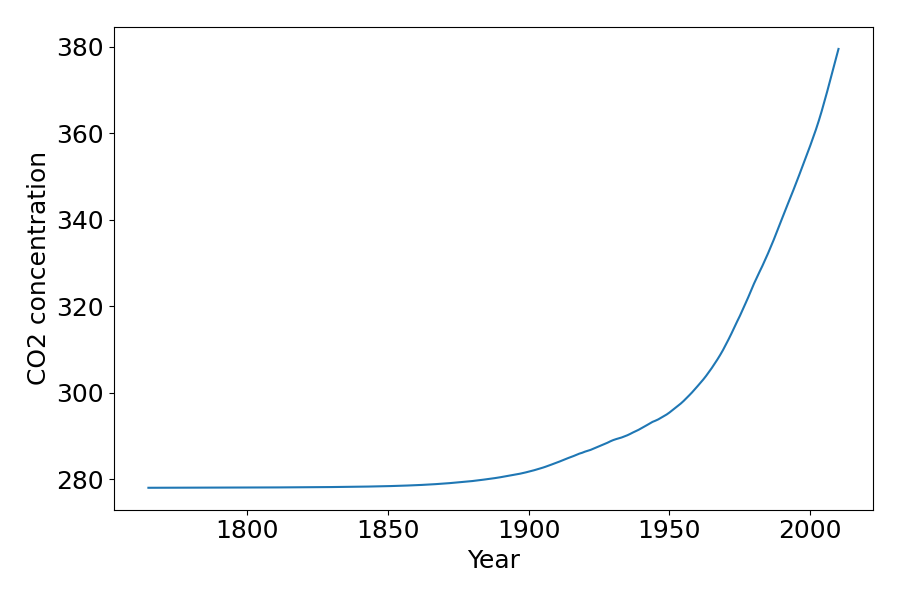

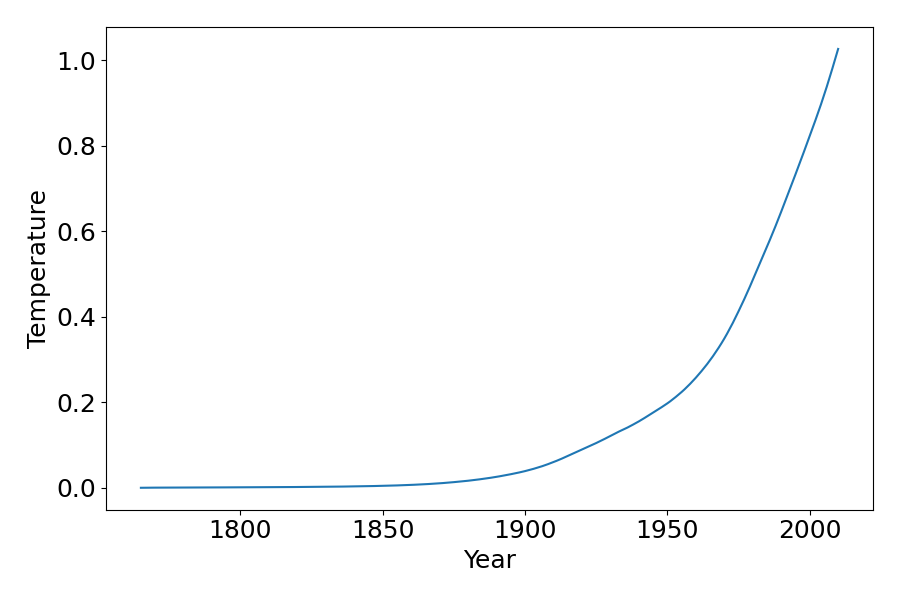

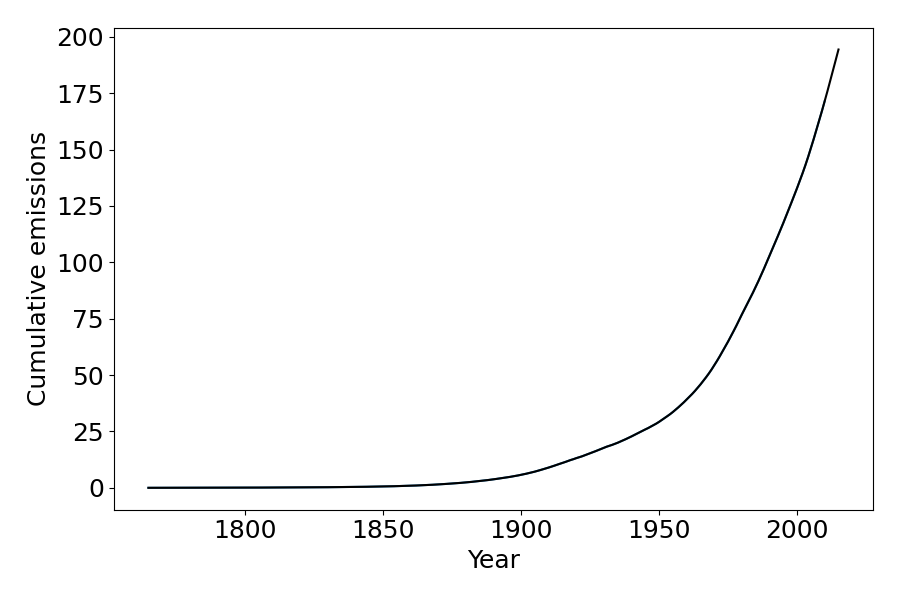

In [11]:
for i,(k,v) in enumerate(variables.items()):
    plt.close(i+1)
    fig, ax = plt.subplots(num=i+1, figsize=(9,6))
    
    plt.plot(years, v)
    if i == 2:
        plt.plot(1765 + np.arange(251), np.cumsum(historic_emissions), color='black')
    plt.xlabel('Year')
    plt.ylabel(k)
    
    fig.tight_layout()

# c

> Take the RCP4.5 as a representative scenario in the python code to compute the probability
density function for the temperature and concentration up to the year 2100

In [12]:
rcp45 = np.loadtxt('rcp4.5_co2_concentrations_since_1765.txt')
len(rcp45)

736

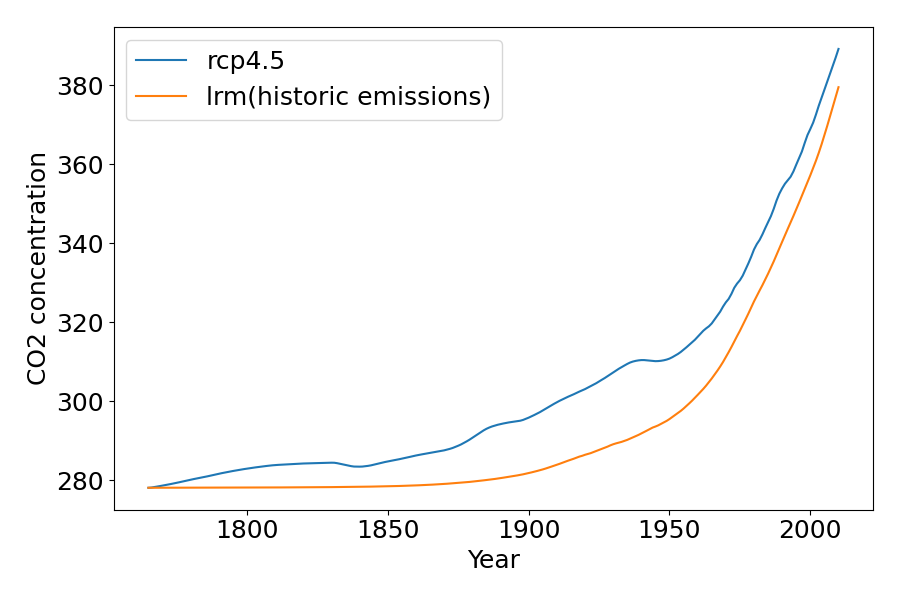

In [14]:
plt.close(1)
fig, ax = plt.subplots(num=1, figsize=(9,6))

plt.plot(years, rcp45[:len(years)], label='rcp4.5')
plt.plot(years, variables['CO2 concentration'], label='lrm(historic emissions)')
plt.xlabel('Year')
plt.ylabel('CO2 concentration')
plt.legend()

fig.tight_layout()

0.13350967455536775